In [1]:


import itertools
import time
import matplotlib.pyplot as plt


flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 16, 18),
    ('F5', 11, 13)
]

crew_members = ['C1', 'C2', 'C3']

MIN_REST = 1



def is_valid_assignment(existing_flights, new_flight):
    """Check if new_flight can be assigned to a crew member."""
    new_id, new_start, new_end = new_flight

    for (fid, start, end) in existing_flights:

        if not (new_end + MIN_REST <= start or end + MIN_REST <= new_start):
            return False
    return True



def backtrack_assignments(flights, crew_members, assignment, index=0):
    if index == len(flights):
        return True

    flight = flights[index]


    for crew in crew_members:
        if is_valid_assignment(assignment[crew], flight):
            assignment[crew].append(flight)

            if backtrack_assignments(flights, crew_members, assignment, index + 1):
                return True


            assignment[crew].remove(flight)

    return False



assignment = {crew: [] for crew in crew_members}

if backtrack_assignments(flights, crew_members, assignment):
    print("Valid Crew Scheduling Found:\n")
    for crew in assignment:
        print(f"{crew}: {[f[0] for f in assignment[crew]]}")
else:
    print("No valid assignment exists.")


Valid Crew Scheduling Found:

C1: ['F1', 'F3', 'F4']
C2: ['F2']
C3: ['F5']


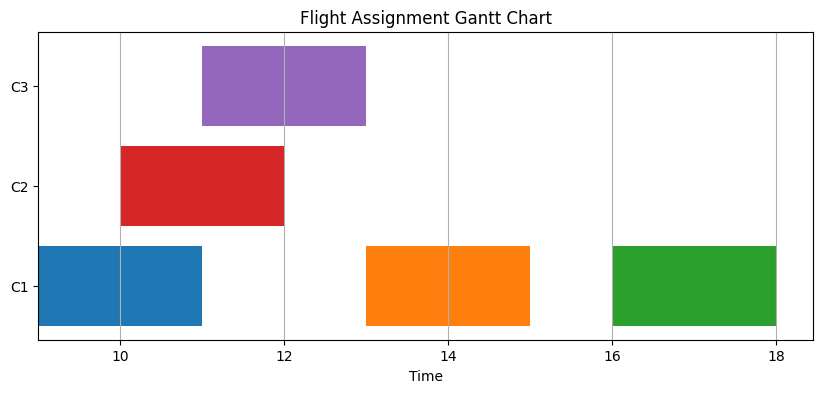

In [2]:


fig, ax = plt.subplots(figsize=(10, 4))

colors = plt.cm.Set3(range(len(crew_members)))

crew_to_y = {crew: i for i, crew in enumerate(crew_members)}

for crew_idx, crew in enumerate(crew_members):
    for fid, start, end in assignment[crew]:
        ax.barh(crew_to_y[crew], end - start, left=start)

plt.yticks(list(crew_to_y.values()), list(crew_to_y.keys()))
plt.xlabel("Time")
plt.title("Flight Assignment Gantt Chart")
plt.grid(axis='x')
plt.show()


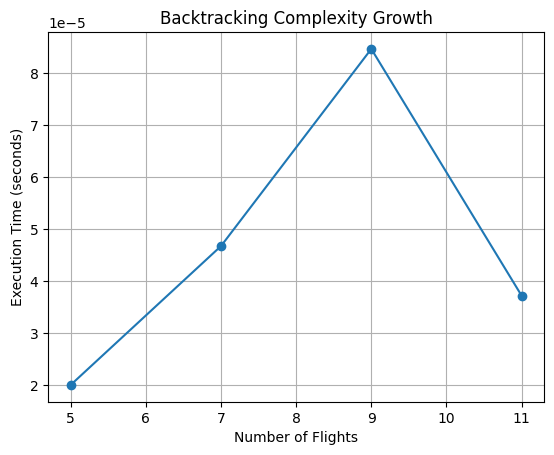

In [3]:


import random

def generate_random_flights(n):
    flights = []
    start = 8
    for i in range(n):
        s = start + random.randint(0, 6)
        e = s + random.randint(1, 3)
        flights.append((f"F{i+1}", s, e))
    return flights

sizes = [5, 7, 9, 11]
times = []

for n in sizes:
    test_flights = generate_random_flights(n)
    test_assignment = {c: [] for c in crew_members}

    start_time = time.time()
    backtrack_assignments(test_flights, crew_members, test_assignment)
    exec_time = time.time() - start_time

    times.append(exec_time)

plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Flights")
plt.ylabel("Execution Time (seconds)")
plt.title("Backtracking Complexity Growth")
plt.grid(True)
plt.show()


In [4]:
!pip install memory_profiler


In [5]:


from memory_profiler import memory_usage
import time
import random
import matplotlib.pyplot as plt

MIN_REST = 1


crew_members = ["C1", "C2", "C3"]


def is_valid_assignment(existing_flights, new_flight):
    new_id, new_start, new_end = new_flight
    for (fid, start, end) in existing_flights:
        if not (new_end + MIN_REST <= start or end + MIN_REST <= new_start):
            return False
    return True


def backtrack_with_counter(flights, crew_members, assignment, index=0, counter=None):
    if counter is not None:
        counter["calls"] += 1

    if index == len(flights):
        return True

    flight = flights[index]

    for crew in crew_members:
        if is_valid_assignment(assignment[crew], flight):
            assignment[crew].append(flight)

            if backtrack_with_counter(flights, crew_members, assignment, index + 1, counter):
                return True

            assignment[crew].remove(flight)

    return False


def generate_flights(n):
    flights = []
    for i in range(n):
        s = random.randint(8, 16)
        e = s + random.randint(1, 3)
        flights.append((f"F{i+1}", s, e))
    return flights



sizes = range(4, 11)
times = []
memories = []
calls_list = []

for n in sizes:
    flights = generate_flights(n)
    assignment = {c: [] for c in crew_members}
    counter = {"calls": 0}


    start_t = time.time()
    backtrack_with_counter(flights, crew_members, assignment, 0, counter)
    end_t = time.time()

    exec_time = end_t - start_t
    times.append(exec_time)
    calls_list.append(counter["calls"])


    mem_used = memory_usage((backtrack_with_counter, (flights, crew_members, {c: [] for c in crew_members}, 0, {"calls":0})), max_iterations=1)[0]
    memories.append(mem_used)

    print(f"Flights: {n}, Time: {exec_time:.4f}s, Memory: {mem_used:.2f} MB, Calls: {counter['calls']}")



Flights: 4, Time: 0.0000s, Memory: 111.38 MB, Calls: 5
Flights: 5, Time: 0.0000s, Memory: 111.45 MB, Calls: 6
Flights: 6, Time: 0.0001s, Memory: 111.45 MB, Calls: 46
Flights: 7, Time: 0.0001s, Memory: 111.45 MB, Calls: 61
Flights: 8, Time: 0.0001s, Memory: 111.45 MB, Calls: 148
Flights: 9, Time: 0.0000s, Memory: 111.45 MB, Calls: 10
Flights: 10, Time: 0.0003s, Memory: 111.45 MB, Calls: 301


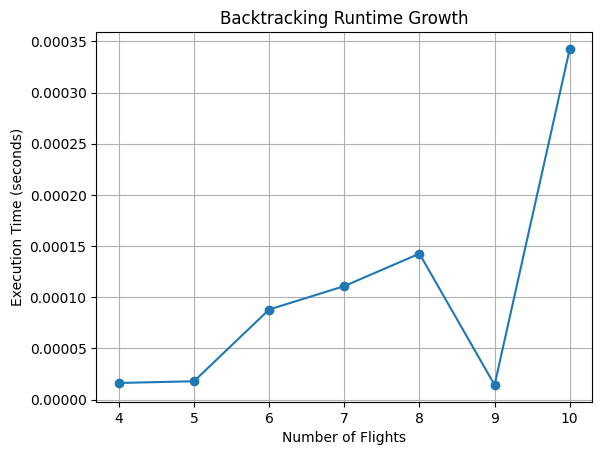

In [6]:
plt.plot(list(sizes), times, marker="o")
plt.xlabel("Number of Flights")
plt.ylabel("Execution Time (seconds)")
plt.title("Backtracking Runtime Growth")
plt.grid(True)
plt.show()


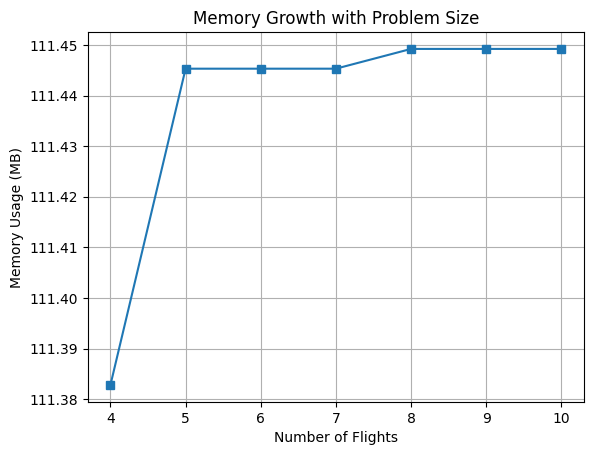

In [7]:
plt.plot(list(sizes), memories, marker="s")
plt.xlabel("Number of Flights")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Growth with Problem Size")
plt.grid(True)
plt.show()


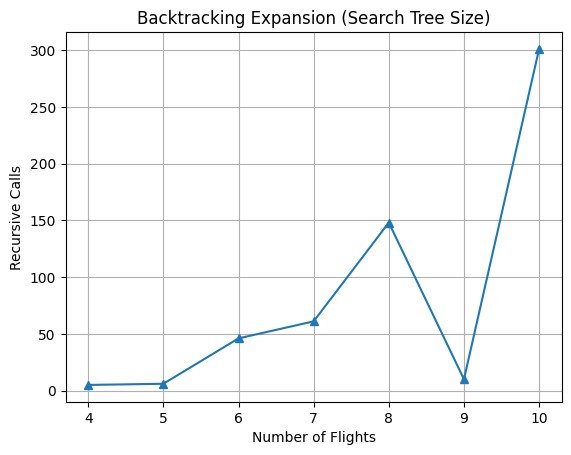

In [8]:
plt.plot(list(sizes), calls_list, marker="^")
plt.xlabel("Number of Flights")
plt.ylabel("Recursive Calls")
plt.title("Backtracking Expansion (Search Tree Size)")
plt.grid(True)
plt.show()
